In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Testing your installation
import tensorflow as tf
from tensorflow import keras


print('TensorFlow: ', tf.__version__)
print('Keras', keras.__version__)
print("numpy :" , np.__version__)

TensorFlow:  2.7.0
Keras 2.7.0
numpy : 1.19.5


In [ ]:
df = pd.read_csv("/content/pima-indians-diabetes.csv - pima-indians-diabetes.csv.csv")

In [ ]:
df.head(2)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
df.columns = ['No of times pregnant' , 'Plasma glucose concentration' ,'Diastolic blood pressure (mm Hg)' , 'Triceps skin fold thickness (mm)'
, '2-Hour serum insulin (mu U/ml)' , 'Body mass index ' , 'Diabetes pedigree function' , 'Age' ,'Class variable' ]

In [ ]:
df.head(2)

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class variable
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
df.isnull().sum()#there is no null values

No of times pregnant                0
Plasma glucose concentration        0
Diastolic blood pressure (mm Hg)    0
Triceps skin fold thickness (mm)    0
2-Hour serum insulin (mu U/ml)      0
Body mass index                     0
Diabetes pedigree function          0
Age                                 0
Class variable                      0
dtype: int64

In [ ]:
df.value_counts().sum()#no categoricl data

767

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = x = df.drop('Class variable', axis=1)
y = df['Class variable']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (613, 8)
x_test shape:  (154, 8)
y_train shape:  (613,)
y_test shape:  (154,)


In [ ]:
x.head(2)

,No of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras.layers import Dense , Flatten
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_split = 0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
18/18 [==============================] - 1s 16ms/step - loss: 0.7466 - accuracy: 0.3448 - val_loss: 0.6972 - val_accuracy: 0.4839
Epoch 2/30
18/18 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.5481 - val_loss: 0.6850 - val_accuracy: 0.6452
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.6751 - val_loss: 0.6823 - val_accuracy: 0.6774
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.6860 - val_loss: 0.6784 - val_accuracy: 0.6935
Epoch 5/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.6969 - val_loss: 0.6741 - val_accuracy: 0.6935
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.7005 - val_loss: 0.6685 - val_accuracy: 0.6935
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.7024 - val_loss: 0.6633 - val_accuracy: 0.6935
Epoch 8/30
18/18 [=

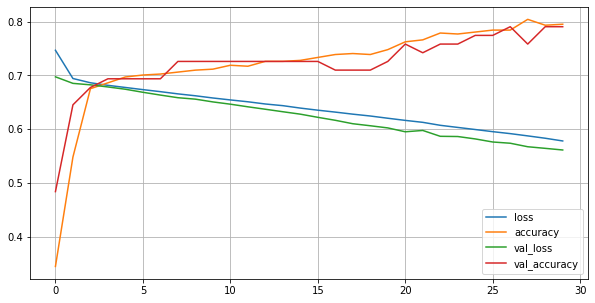

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7597


[0.5881298780441284, 0.7597402334213257]

In [ ]:
y_pred = np.round(model.predict(x_test))


In [ ]:
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)



(154, 1)
(154,)
(154, 1)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)



array([[82, 15],
       [22, 35]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        97
           1       0.70      0.61      0.65        57

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
#day_2
#without cnn
#first we will work on mnist Data set

In [ ]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
X data type:  uint8
y_train shape:  (60000,)


In [ ]:
X_train[1].shape

(28, 28)

In [ ]:
X_train[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

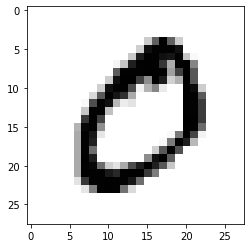

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [ ]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()
print(X_train[1])

In [ ]:
X_train = X_train/255

In [ ]:
# from sklearn.preprocessing import StandardScaler
# data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# scaler = StandardScaler()
# print(scaler.fit(data))
# StandardScaler()
# print(scaler.mean_)

StandardScaler()
[0.5 0.5]


In [ ]:
# print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [ ]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [ ]:
class_name = np.array(["zero", "one", "two",
                       "three", "four", "five", "six",
                       "seven", "eight", "nine"])

In [ ]:
y_train[1], class_name[y_train[1]]

(0, 'zero')

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras import layers

model.add(layers.Flatten(input_shape=X_train[0].shape, name='input'))
model.add(layers.Dense(400, activation='relu', name='hidden_1'))
# model.add(layers.Dense(300, activation='relu', name='hidden_2'))
model.add(layers.Dense(200, activation='relu', name='hidden_2'))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [ ]:
model.summary()
#in first hidden layer there is 400 bias
#in second hidden layer there is 200 bias

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 400)               314000    
                                                                 
 hidden_2 (Dense)            (None, 200)               80200     
                                                                 
 output (Dense)              (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden_1 = model.layers[1]
h1_weights, h1_bias = hidden_1.get_weights()
print(h1_weights.shape)
print(h1_bias.shape)

(784, 400)
(400,)


In [ ]:
h1_weights[0]

array([ 1.2654915e-02, -1.5845682e-02,  3.4271114e-02, -3.9477818e-02,  3.1371981e-02,  2.3055010e-02, -2.5329784e-02,  3.1434588e-02, -3.9901409e-02, -2.2468310e-02,  4.9554661e-02,  3.4894124e-03,
       -4.7491185e-02,  5.9185050e-02,  3.0932941e-02, -6.8460256e-02, -4.4433463e-02,  7.1078621e-02, -3.4739278e-02,  1.4641672e-02, -5.3190216e-03,  6.5509133e-02, -6.5602347e-02,  2.3871660e-03,
        6.3353084e-02,  3.1021126e-02,  9.0040267e-05, -4.8846662e-02, -2.7276844e-02,  3.8039126e-02,  9.9419653e-03, -6.8160623e-02,  4.1429460e-02,  2.6884444e-02, -4.4251435e-02,  1.5807696e-02,
       -1.7401632e-02,  5.6037627e-02,  3.2307103e-02,  1.0726221e-02, -5.2380912e-02, -7.0128083e-02,  4.5229495e-02,  5.2268676e-02,  2.9779017e-02,  2.8879926e-02,  9.6869022e-03,  4.8516244e-03,
        4.3664142e-02, -1.9411929e-02,  5.2049093e-02,  4.1389570e-02, -5.7615146e-02,  6.0845368e-02, -5.1727004e-02,  4.9778692e-02, -2.3002699e-02,  5.8443747e-02,  1.7840229e-02, -6.9948211e-02,
     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5903 - accuracy: 0.8498 - val_loss: 0.2561 - val_accuracy: 0.9296
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2880 - accuracy: 0.9180 - val_loss: 0.2051 - val_accuracy: 0.9408
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2354 - accuracy: 0.9328 - val_loss: 0.1689 - val_accuracy: 0.9558
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2008 - accuracy: 0.9425 - val_loss: 0.1511 - val_accuracy: 0.9592
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1746 - accuracy: 0.9499 - val_loss: 0.1352 - val_accuracy: 0.9642
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1537 - accuracy: 0.9566 - val_loss: 0.1240 - val_accuracy: 0.9658
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1376 - accuracy: 0.9601 - val_loss: 0.1098 - val_accur

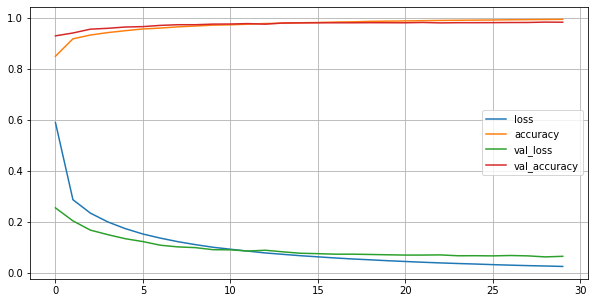

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9798


[0.06463407725095749, 0.9797999858856201]

In [ ]:
X_new = X_test[5].reshape(1,-1)
y_pred = model.predict(X_new)
y_pred

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
print(X_test[5])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 254 107   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 227 254 254   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 254 254 165   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 203 254 254  73   

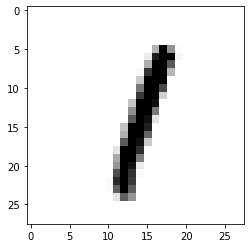

In [ ]:
plt.imshow(X_test[5], cmap=plt.cm.binary)
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test[5])
print('predicted values', y_pred)
class_name[y_pred[:]]


actual values 1
predicted values [1]


array(['one'], dtype='<U5')

In [ ]:
# with cnn

# With CNN

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


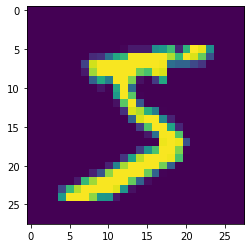

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
X data type:  uint8
y_train shape:  (60000,)


In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

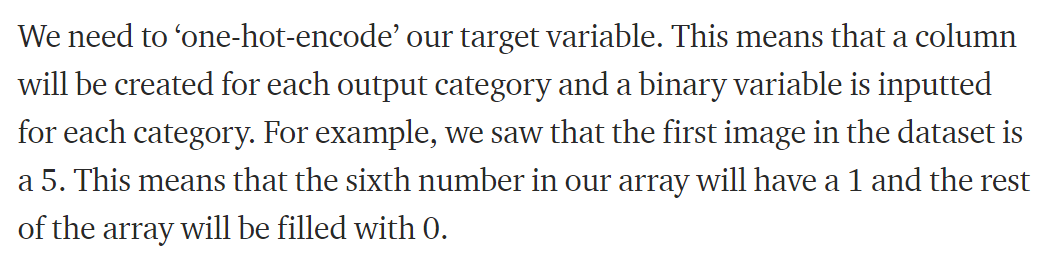

In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7064 - accuracy: 0.8910 - val_loss: 0.1209 - val_accuracy: 0.9645
Epoch 2/3
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1080 - accuracy: 0.9682 - val_loss: 0.1026 - val_accuracy: 0.9698
Epoch 3/3
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0796 - accuracy: 0.9763 - val_loss: 0.0748 - val_accuracy: 0.9795


In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])


array([[2.7543034e-11, 2.0335465e-08, 7.0134242e-08, 1.8683059e-08, 1.6928045e-14, 3.7810075e-11, 5.6548802e-19, 9.9999988e-01, 4.3183937e-10, 7.1592949e-09],
       [1.7708766e-08, 5.4574706e-05, 9.9994171e-01, 2.8506065e-06, 8.2889479e-10, 1.4758119e-12, 4.4109746e-07, 1.0252801e-08, 3.3189329e-07, 1.7589764e-12],
       [1.2310757e-06, 9.9848467e-01, 1.3059675e-05, 2.1978184e-07, 8.6755597e-04, 3.4879292e-06, 1.5239387e-05, 3.8168546e-06, 6.1028689e-04, 4.3986830e-07],
       [9.9985588e-01, 1.5277436e-09, 5.6826215e-05, 2.4804234e-07, 7.1823244e-08, 1.9787801e-06, 8.0817423e-05, 4.0804147e-09, 1.1131057e-07, 3.9302745e-06]], dtype=float32)

In [ ]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0748 - accuracy: 0.9795


[0.07484523952007294, 0.9794999957084656]

In [ ]:
#working on cifar10 data set
#first by dense method

In [ ]:
from keras.datasets import mnist ,cifar10
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
X data type:  uint8
y_train shape:  (50000, 1)


In [ ]:
X_train[1].shape

(32, 32, 3)

In [ ]:
X_train[1][0].shape

(32, 3)

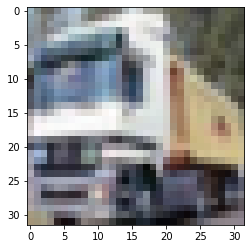

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [ ]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()
print(X_train[1])

In [ ]:
X_train = X_train/255

In [ ]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
class_name = np.array(["airplane", "automobile", "bird",
                       "cat", "deer", "dog", "frog",
                       "horse", "ship", "truck"])

In [ ]:
y_train[1], class_name[y_train[1]]

(array([9], dtype=uint8), array(['truck'], dtype='<U10'))

In [ ]:
# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras import layers

model.add(layers.Flatten(input_shape=X_train[0].shape, name='input'))
model.add(layers.Dense(2000, activation='relu', name='hidden_1'))
model.add(layers.Dense(1000, activation='relu', name='hidden_2'))
model.add(layers.Dense(800, activation='relu', name='hidden_3'))
model.add(layers.Dense(500, activation='relu', name='hidden_4'))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 3072)              0         
                                                                 
 hidden_1 (Dense)            (None, 2000)              6146000   
                                                                 
 hidden_2 (Dense)            (None, 1000)              2001000   
                                                                 
 hidden_3 (Dense)            (None, 800)               800800    
                                                                 
 hidden_4 (Dense)            (None, 500)               400500    
                                                                 
 output (Dense)              (None, 10)                5010      
                                                                 
Total params: 9,353,310
Trainable params: 9,353,310
No

In [ ]:
model.layers

In [ ]:
hidden_1 = model.layers[1]
h1_weights, h1_bias = hidden_1.get_weights()
print(h1_weights.shape)
print(h1_bias.shape)

(3072, 2000)
(2000,)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/30
1433/1433 [==============================] - 13s 9ms/step - loss: 1.8942 - accuracy: 0.3065 - val_loss: 1.8184 - val_accuracy: 0.3295
Epoch 2/30
1433/1433 [==============================] - 12s 8ms/step - loss: 1.7301 - accuracy: 0.3750 - val_loss: 1.6959 - val_accuracy: 0.4065
Epoch 3/30
1433/1433 [==============================] - 12s 8ms/step - loss: 1.6483 - accuracy: 0.4037 - val_loss: 1.6463 - val_accuracy: 0.4176
Epoch 4/30
1433/1433 [==============================] - 12s 8ms/step - loss: 1.5870 - accuracy: 0.4281 - val_loss: 1.5834 - val_accuracy: 0.4399
Epoch 5/30
1433/1433 [==============================] - 11s 8ms/step - loss: 1.5411 - accuracy: 0.4457 - val_loss: 1.6135 - val_accuracy: 0.4255
Epoch 6/30
1433/1433 [==============================] - 12s 8ms/step - loss: 1.5115 - accuracy: 0.4559 - val_loss: 1.5496 - val_accuracy: 0.4454
Epoch 7/30
1433/1433 [==============================] - 12s 8ms/step - loss: 1.4780 - accuracy: 0.4685 - val_loss: 1.5342 - val_ac

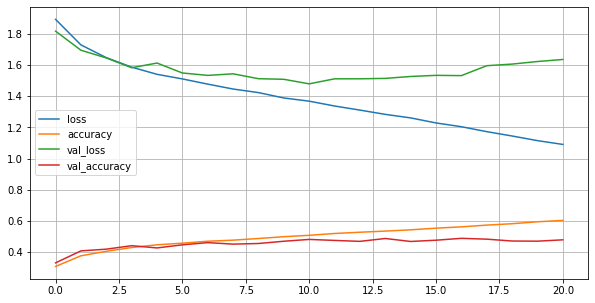

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.4895 - accuracy: 0.4728


[1.4895066022872925, 0.47279998660087585]

In [ ]:
X_new = X_test[5].reshape(1,-1)
y_pred = model.predict(X_new)
y_pred

array([[1.0243240e-37, 0.0000000e+00, 0.0000000e+00, 1.1896505e-09, 0.0000000e+00, 1.0000000e+00, 1.0267560e-32, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

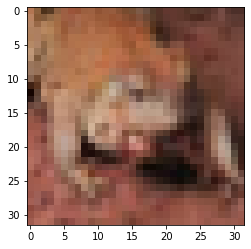

In [ ]:
plt.imshow(X_test[5], cmap=plt.cm.binary)
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('actual values', y_test[5])
print('predicted values', y_pred)
class_name[y_pred[:]]


actual values [6]
predicted values [5]


array(['dog'], dtype='<U10')

In [ ]:
# using cnn

In [ ]:
from keras.datasets import cifar10
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X data type: ', X_train.dtype)
print('y_train shape: ', y_train.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
X data type:  uint8
y_train shape:  (50000, 1)


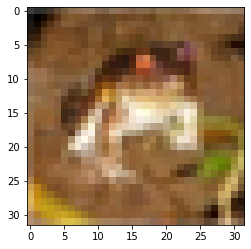

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(32, 32, 3)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#create model
model = Sequential()
#add model layers
model.add(Conv2D(20, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(layers.Dense(2000, activation='relu', name='hidden_1'))
model.add(layers.Dense(1000, activation='relu', name='hidden_2'))
model.add(layers.Dense(800, activation='relu', name='hidden_3'))
model.add(layers.Dense(500, activation='relu', name='hidden_4'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=5/60,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # batch_size =

Epoch 1/30
1433/1433 [==============================] - 15s 10ms/step - loss: 1.8645 - accuracy: 0.3300 - val_loss: 1.5938 - val_accuracy: 0.4060
Epoch 2/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.5467 - accuracy: 0.4380 - val_loss: 1.4617 - val_accuracy: 0.4653
Epoch 3/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.4342 - accuracy: 0.4818 - val_loss: 1.4447 - val_accuracy: 0.4819
Epoch 4/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.3641 - accuracy: 0.5104 - val_loss: 1.3118 - val_accuracy: 0.5344
Epoch 5/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.3069 - accuracy: 0.5360 - val_loss: 1.3321 - val_accuracy: 0.5272
Epoch 6/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.2567 - accuracy: 0.5508 - val_loss: 1.2794 - val_accuracy: 0.5512
Epoch 7/30
1433/1433 [==============================] - 14s 10ms/step - loss: 1.2202 - accuracy: 0.5683 - val_loss: 1.2210 -

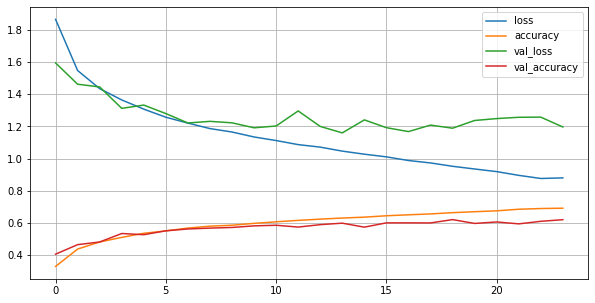

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1645 - accuracy: 0.6003


[1.164473056793213, 0.6003000140190125]

313/313 [==============================] - 2s 5ms/step - loss: 2.0657 - accuracy: 0.5985


[2.065737009048462, 0.5985000133514404]